# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [5]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [6]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.59004426 0.5625933  0.59004426]
  [0.5882353  0.56078434 0.5882353 ]
  [0.5940549  0.5666039  0.5940549 ]
  ...
  [0.55169123 0.52424026 0.55169123]
  [0.54975134 0.52230036 0.54975134]
  [0.5478114  0.5203604  0.5478114 ]]

 [[0.5913375  0.5638865  0.5913375 ]
  [0.5882353  0.56078434 0.5882353 ]
  [0.5927616  0.5653106  0.5927616 ]
  ...
  [0.5517787  0.5243277  0.5517787 ]
  [0.5543652  0.52691424 0.5543652 ]
  [0.5569518  0.52950084 0.5569518 ]]

 [[0.5926308  0.5651798  0.5926308 ]
  [0.5882353  0.56078434 0.5882353 ]
  [0.5914683  0.5640173  0.5914683 ]
  ...
  [0.5559349  0.5284839  0.5559349 ]
  [0.553995   0.52654403 0.553995  ]
  [0.55205506 0.5246041  0.55205506]]

 ...

 [[0.60278416 0.55572534 0.5635685 ]
  [0.5995509  0.5524921  0.5603352 ]
  [0.5963177  0.5492589  0.557102  ]
  ...
  [0.5088761  0.4696604  0.47358197]
  [0.5362397  0.497024   0.50094557]
  [0.58810496 0.5488893  0.55281085]]

 [[0.58536094 0.5383021  0.54614526]
  [0.58342105 0.53636223 0.54420537]


In [8]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [9]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [10]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.6889765  0.657604   0.70858437]
  [0.6971387  0.6657662  0.71674657]
  [0.6905165  0.6591439  0.7101243 ]
  ...
  [0.65803444 0.607054   0.6737207 ]
  [0.64705884 0.59607846 0.6627451 ]
  [0.64705884 0.59607846 0.6627451 ]]

 [[0.68886364 0.6574911  0.7084715 ]
  [0.69717646 0.6658039  0.7167843 ]
  [0.69066703 0.6592945  0.7102749 ]
  ...
  [0.6509637  0.59998333 0.66665   ]
  [0.6453332  0.5943528  0.66101944]
  [0.6452579  0.5942775  0.66094416]]

 [[0.6843932  0.6530207  0.70400107]
  [0.6885545  0.657182   0.70816237]
  [0.6858558  0.65448326 0.70546365]
  ...
  [0.64318264 0.59220225 0.6588689 ]
  [0.64007837 0.589098   0.65576464]
  [0.64011604 0.58913565 0.6558023 ]]

 ...

 [[0.5007402  0.45368132 0.5085833 ]
  [0.5006272  0.4535684  0.50847036]
  [0.48794672 0.4408879  0.49578986]
  ...
  [0.4690781  0.42594084 0.48868594]
  [0.44094205 0.3978048  0.4605499 ]
  [0.4305624  0.38742512 0.45017025]]

 [[0.52522904 0.47817025 0.5330722 ]
  [0.5255678  0.47850898 0.53341097]


## Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

d:\Potato Disease Classification Deep Learning Project\.venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

d:\Potato Disease Classification Deep Learning Project\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 35s 720ms/step - accuracy: 0.4932 - loss: 0.9007 - val_accuracy: 0.4844 - val_loss: 0.8578
Epoch 2/20
 1/47 ━━━━━━━━━━━━━━━━━━━━ 8s 196ms/step - accuracy: 0.4688 - loss: 1.0344

d:\Potato Disease Classification Deep Learning Project\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4688 - loss: 1.0344 - val_accuracy: 0.5938 - val_loss: 0.8277
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 314ms/step - accuracy: 0.6974 - loss: 0.6513 - val_accuracy: 0.7969 - val_loss: 0.4826
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9062 - loss: 0.4232 - val_accuracy: 0.8021 - val_loss: 0.4791
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 315ms/step - accuracy: 0.8134 - loss: 0.4271 - val_accuracy: 0.8490 - val_loss: 0.3569
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8438 - loss: 0.3702 - val_accuracy: 0.8750 - val_loss: 0.3513
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 309ms/step - accuracy: 0.8847 - loss: 0.2867 - val_accuracy: 0.8958 - val_loss: 0.3015
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9375 - loss: 0.2845 - val_accuracy: 0.8854 - val_loss: 0.3146
Epoch 9/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 318ms/step - accuracy: 0.8982 - loss: 0.2640 - val_accuracy: 0.9271 - val_

In [17]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 560ms/step - accuracy: 0.9559 - loss: 0.1120


In [18]:
scores

[0.11203467845916748, 0.9559164643287659]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [19]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [20]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

20

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9007471203804016,
 1.034371256828308,
 0.6513451337814331,
 0.42321741580963135,
 0.4270975589752197]

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [27]:
val_acc

[0.484375,
 0.59375,
 0.796875,
 0.8020833134651184,
 0.8489583134651184,
 0.875,
 0.8958333134651184,
 0.8854166865348816,
 0.9270833134651184,
 0.9114583134651184,
 0.953125,
 0.9375,
 0.859375,
 0.953125,
 0.9114583134651184,
 0.9479166865348816,
 0.8802083134651184,
 0.859375,
 0.9479166865348816,
 0.953125]

In [28]:
acc

[0.49321573972702026,
 0.46875,
 0.6974219679832458,
 0.90625,
 0.8134328126907349,
 0.84375,
 0.8846675753593445,
 0.9375,
 0.898236095905304,
 0.84375,
 0.9504749178886414,
 0.9375,
 0.9470827579498291,
 0.9375,
 0.9111261963844299,
 1.0,
 0.9497964978218079,
 0.9375,
 0.9565807580947876,
 0.9375]

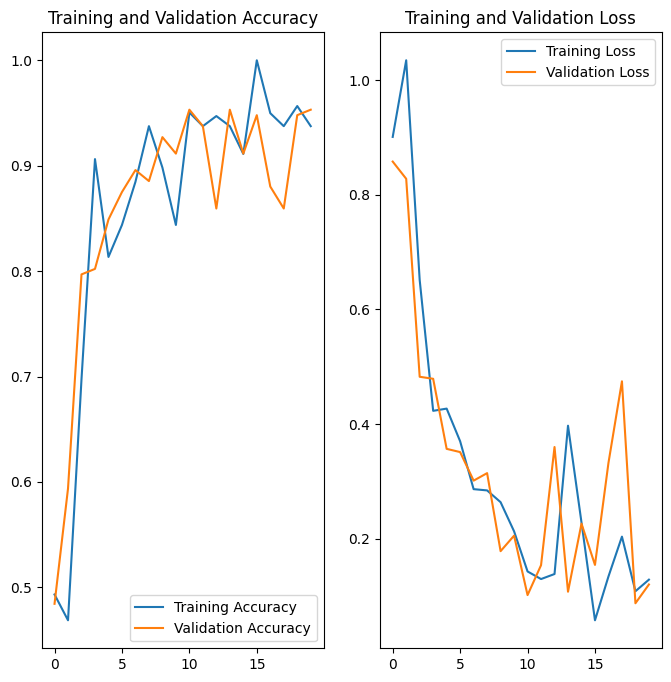

In [29]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict


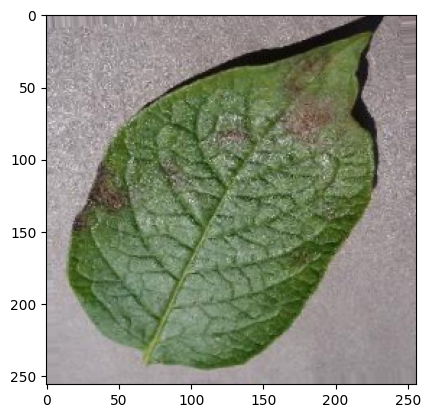

Actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted label: Potato___Late_blight


In [31]:
import numpy as np
import matplotlib.pyplot as plt

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]                      # first image
    first_label = int(label_batch[0])                 # correct variable name
    
    print("First image to predict")
    plt.imshow(first_image)
    plt.show()
    print("Actual label:", class_names[first_label])  # actual class
    
    # Expand dims so model sees a batch of size 1
    batch_prediction = model.predict(np.expand_dims(first_image, axis=0))
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break  # only check first batch


### Write a function for inference

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


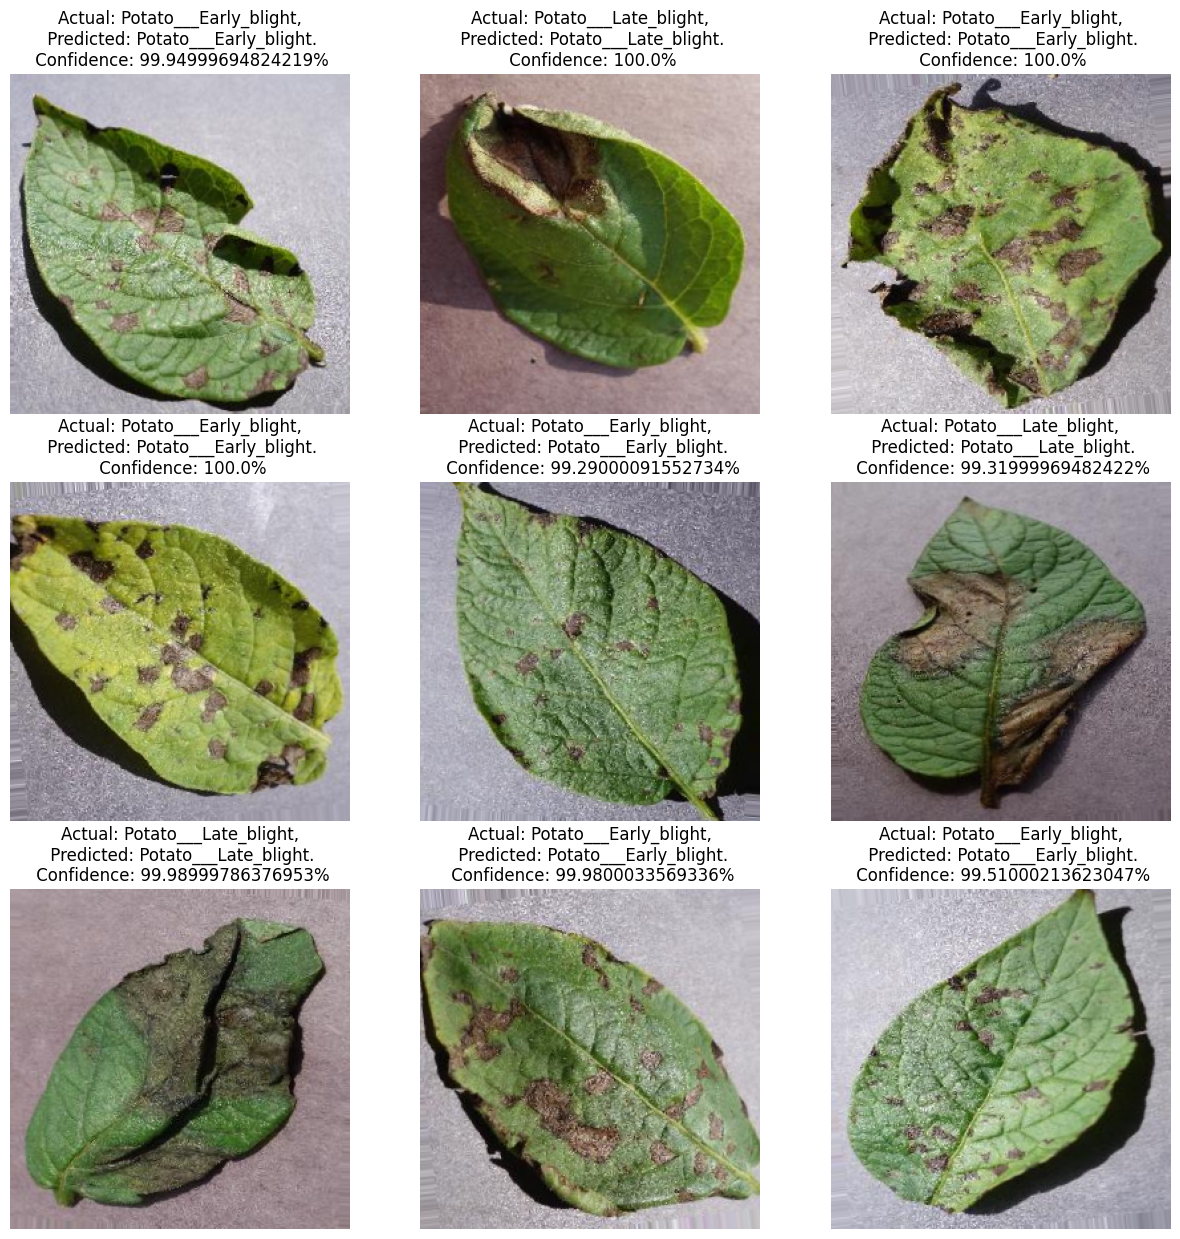

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [34]:
model.save("../potatoes.h5")